# Functions and imports

In [ ]:
import random
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from IPython.display import HTML
from google.colab import files
from IPython.display import set_matplotlib_formats

random.seed(42)
%matplotlib inline
set_matplotlib_formats('svg')

In [ ]:
!unzip -q /content/drive/MyDrive/Работка/CompTech2022/few_data.zip -d /content/EVRAZ_data

In [ ]:
DATA_DIR = '/content/EVRAZ_data/few_data/'

In [ ]:
glob.glob(DATA_DIR + '*.jpg')

['/content/EVRAZ_data/few_data/20210712_141048_857A_ACCC8EAF31F3_450.jpg',
 '/content/EVRAZ_data/few_data/20210712_141048_857A_ACCC8EAF31F3_480.jpg',
 '/content/EVRAZ_data/few_data/20210712_141048_857A_ACCC8EAF31F3_90.jpg',
 '/content/EVRAZ_data/few_data/20210712_141048_857A_ACCC8EAF31F3_240.jpg',
 '/content/EVRAZ_data/few_data/20210712_141048_857A_ACCC8EAF31F3_360.jpg',
 '/content/EVRAZ_data/few_data/20210712_141048_857A_ACCC8EAF31F3_540.jpg',
 '/content/EVRAZ_data/few_data/20210712_141048_857A_ACCC8EAF31F3_0.jpg',
 '/content/EVRAZ_data/few_data/20210712_141048_857A_ACCC8EAF31F3_420.jpg',
 '/content/EVRAZ_data/few_data/20210712_141048_857A_ACCC8EAF31F3_60.jpg',
 '/content/EVRAZ_data/few_data/20210712_141048_857A_ACCC8EAF31F3_180.jpg',
 '/content/EVRAZ_data/few_data/20210712_141048_857A_ACCC8EAF31F3_270.jpg',
 '/content/EVRAZ_data/few_data/20210712_141048_857A_ACCC8EAF31F3_570.jpg',
 '/content/EVRAZ_data/few_data/20210712_141048_857A_ACCC8EAF31F3_330.jpg',
 '/content/EVRAZ_data/few_dat

In [ ]:
def display_image_grid(images, text=None, cols=7):
    rows = len(images) // cols
    figure, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 8))
    for i, (image, text) in enumerate(zip(images, text)):
        image = image.permute(1, 2, 0)
        ax.ravel()[i].imshow(image, aspect="auto")
        if text:
            ax.ravel()[i].text(10, 25, 'AE MSE: {:.5f}'.format(text), fontsize=9, color=(1, 1, 0))
        ax.ravel()[i].set_axis_off()
    plt.subplots_adjust(wspace=.01, hspace=.01)
    # plt.tight_layout()
    plt.show()


def show_edges(img, text=None):
    focus_measure = cv2.Laplacian(img, cv2.CV_64F, ksize=3)

    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

    plt.figure(figsize=(8, 8))
    plt.text(10, 45, "{}: {:.2f}".format(text, focus_measure), fontsize=18, color=(1, 1, 0))
    plt.axis('off')
    plt.imshow(img)

## Canny

In [ ]:
for img_path in [glob.glob(DATA_DIR + '*.jpg')[0]]:
    img_gray = cv2.imread(img_path, 0)

    # Blur the image for better edge detection
    img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)

    for threshold_1 in range(10, 150, 20):
        for threshold_2 in range(110, 250, 20):
            # dafault L2gradient=False
            edges = cv2.Canny(img_blur, threshold1=threshold_1, threshold2=threshold_2, L2gradient=False)

            plt.figure(figsize=(15, 10))
            plt.subplot(121)
            plt.imshow(img_blur, cmap = 'gray')
            plt.title('Original Image')
            plt.xticks([]), plt.yticks([])

            plt.subplot(122)
            plt.imshow(edges,cmap = 'gray')
            plt.title('Edge Image'), 
            plt.xticks([]), plt.yticks([])
            plt.show()

## experiments with custom filter

In [ ]:
# n**2 - 1 - center element

In [ ]:
custom_filter_3x3 = np.array([[-1, -1,- 1],
                              [-1,  8,- 1],
                              [-1, -1,- 1]]
                             )

In [ ]:
custom_filter_5x5 = np.array([[-1, -1, -1, -1, -1],
                              [-1, -1, -1, -1, -1],
                              [-1, -1, 24, -1, -1],
                              [-1, -1, -1, -1, -1],
                              [-1, -1, -1, -1, -1]]
                             )

In [ ]:
for img_path in [glob.glob(DATA_DIR + '*.jpg')[0]]:
    img_gray = cv2.imread(img_path, 0)
    img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)

    filtered_3x3 = cv2.filter2D(src=img_blur, ddepth=-1, kernel=custom_filter_3x3)
    filtered_5x5 = cv2.filter2D(src=img_blur, ddepth=-1, kernel=custom_filter_5x5)

In [ ]:
def put_text_on_img(img, text: str=None):
    font                   = cv2.FONT_HERSHEY_SIMPLEX
    textBottom             = (10, 30)
    fontScale              = 1
    thickness              = 2
    fontColor              = (0, 0, 0)
    lineType               = 2

    
    cv2.rectangle(img, 
                 (0, 0),
                 (200, 80),
                 (255, 255, 255),
                 -1)
    
    cv2.putText(
            img=img,
            text=text, 
            org=textBottom, 
            fontFace=font, 
            fontScale=fontScale,
            color=fontColor,
            thickness=thickness,
            lineType=lineType)
    
    return img

In [ ]:
thresholded_3x3 = cv2.adaptiveThreshold(filtered_3x3, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 5)
thresholded_5x5 = cv2.adaptiveThreshold(filtered_5x5, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 5)

filtered_3x3_text = put_text_on_img(thresholded_3x3, '3x3custom')
filtered_5x5_text = put_text_on_img(thresholded_5x5, '5x5custom')

cv2.imwrite('/content/custom_filter_3x3.jpg', filtered_3x3_text)
cv2.imwrite('/content/custom_filter_5x5.jpg', filtered_5x5_text)

True

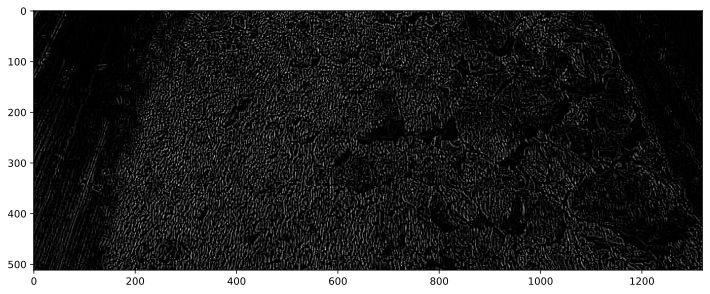

In [ ]:
plt.figure(figsize=(12, 8), dpi=600)
plt.imshow(filtered_3x3, cmap='gray')
plt.show();

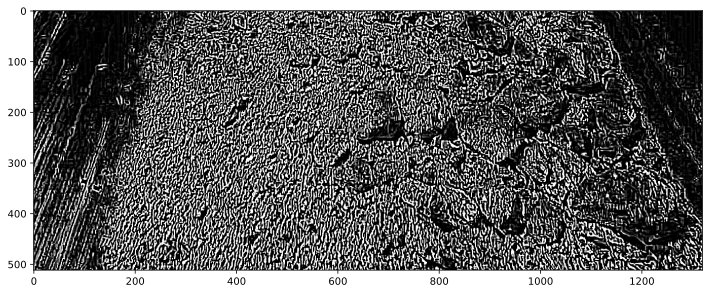

In [ ]:
plt.figure(figsize=(12, 8), dpi=600)
plt.imshow(filtered_5x5, cmap='gray')
plt.show();

## experiments with laplacian

### hist after laplacian filter

In [ ]:
for img_path in [glob.glob(DATA_DIR + '*.jpg')[0]]:
    img_gray = cv2.imread(img_path, 0)
    img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)

    edges = cv2.Laplacian(img_blur, cv2.CV_64F, ksize=3)

In [ ]:
edges.reshape(-1).shape

(675840,)

In [ ]:
edges.max()

2.329075037073572e+17

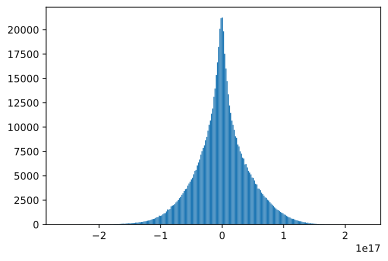

In [ ]:
plt.hist(edges.reshape(-1), 256)
plt.show();

normilize image to fit into 0-255 range:

In [ ]:
norm_image = cv2.normalize(edges, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
norm_image = norm_image.astype(np.uint8)

In [ ]:
print(norm_image.min(), norm_image.max())

0 255


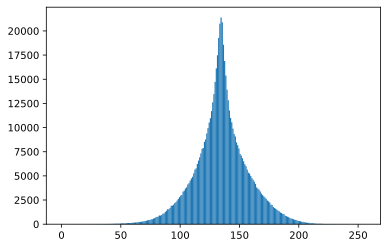

In [ ]:
plt.hist(norm_image.reshape(-1), 256, [0, 256])
plt.show();

### .gif with different thresholdes for different kernels of laplacian

In [ ]:
laplacian_imgs = {}

# for one image for example
for img_path in [sorted(glob.glob(DATA_DIR + '*.jpg'))[0]]:
    img_gray = cv2.imread(img_path, 0)
    # Blur the image for better edge detection
    img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)

    for ksize in range(3, 20, 2):
        edges = cv2.Laplacian(img_blur, cv2.CV_64F, ksize=ksize)
        laplacian_imgs[f'kernel_{ksize}'] = edges

In [ ]:
def create_gif_laplacian_thresh(img, ksize: int, duration=120):
    norm_image = cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    norm_image = norm_image.astype(np.uint8)
    # print(norm_image.min(), norm_image.max())
    assert norm_image.min() >= 0 and norm_image.max() <= 255, 'check image normalization'

    # gif creation config 
    start_image = Image.fromarray(norm_image.copy())
    appended_images = []

    font                   = cv2.FONT_HERSHEY_SIMPLEX
    fontScale              = 1
    thickness              = 2
    fontColor              = (0, 0, 0)
    lineType               = 2

    for thresh in range(85, 191, 2):
    # for _ in range(1):
        th, thresholded = cv2.threshold(norm_image, thresh, 255, cv2.THRESH_BINARY);
        # thresholded = cv2.adaptiveThreshold(norm_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 15)

        cv2.rectangle(thresholded, 
                        (0, 0),
                        (200, 80),
                        (255, 255, 255),
                        -1)

        text = f'thresh=adaptive\nkernel={ksize}'
        y0, dy = 30, 35
        for i, line in enumerate(text.split('\n')):
            y = y0 + i*dy

            cv2.putText(
                img=thresholded,
                text=line, 
                org=(10, y), 
                fontFace=font, 
                fontScale=fontScale,
                color=fontColor,
                thickness=thickness,
                lineType=lineType)

        appended_images.append(Image.fromarray(thresholded))
    
    # if you want to save one image - refactor code if needed
    # Image.fromarray(thresholded).save(f'/content/laplacian_kernel_{ksize}.jpg')
    
    start_image.save(fp=f'/content/laplacian_kernel_{ksize}.gif', format='GIF', append_images=appended_images,
         save_all=True, duration=duration, loop=1)

In [ ]:
create_gif_laplacian_thresh(laplacian_imgs['kernel_3'], ksize=3)

In [ ]:
files.download('/content/laplacian_kernel_3.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### contours

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
def thresh_callback(img, val):
    threshold = val
    th, thresholded = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY);

    # Find contours
    contours, hierarchy = cv2.findContours(thresholded, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    # Draw contours
    drawing = np.zeros((thresholded.shape[0], thresholded.shape[1], 3), dtype=np.uint8)
    print(len(contours))
    for i in range(len(contours)):
        color = (random.randint(0,256), random.randint(0,256), random.randint(0,256))
        cv2.drawContours(drawing, contours, i, color, 2, cv2.LINE_8, hierarchy, 0)
    # Show in a window
    cv2_imshow(drawing)
    return drawing

9323


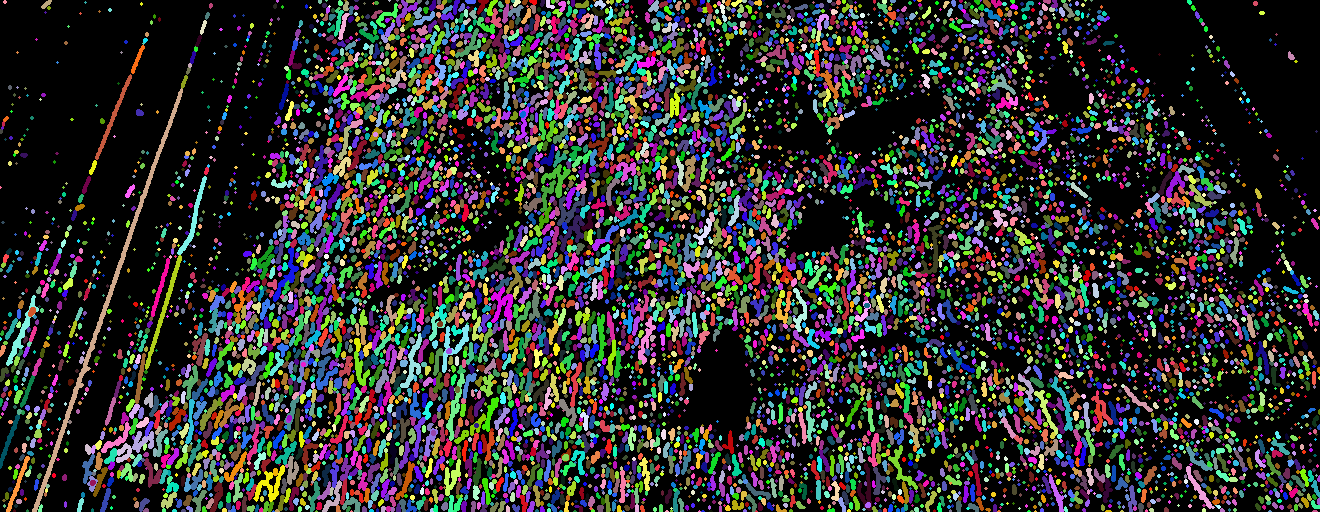

In [ ]:
norm_image = cv2.normalize(laplacian_imgs['kernel_5'], None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
norm_image = norm_image.astype(np.uint8)
drawing = thresh_callback(norm_image, 160)

### example for 3x3 laplacian kernel

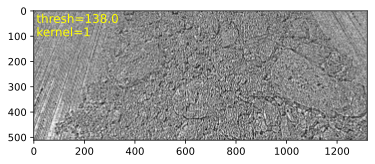

In [ ]:
norm_image = cv2.normalize(laplacian_imgs['kernel_1'], None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
norm_image = norm_image.astype(np.uint8)
thresh, thresholded = cv2.threshold(norm_image, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU);

plt.imshow(thresholded, cmap='gray')
plt.text(10, 100, f'thresh={thresh}\nkernel={1}', fontsize=12, color=(1, 1, 0))

plt.show();

In [ ]:
norm_image = cv2.normalize(laplacian_imgs['kernel_1'], None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
norm_image = norm_image.astype(np.uint8)

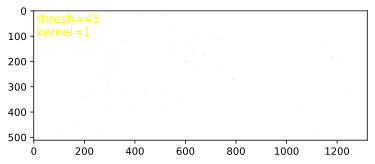

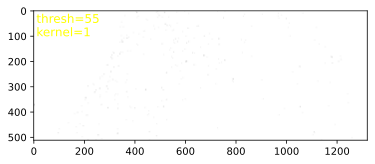

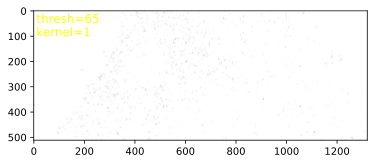

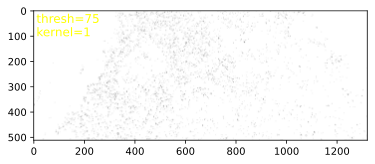

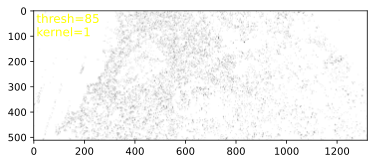

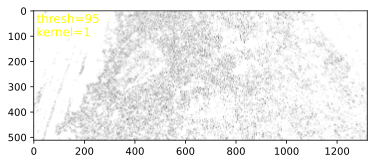

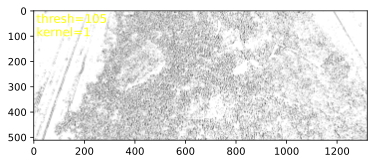

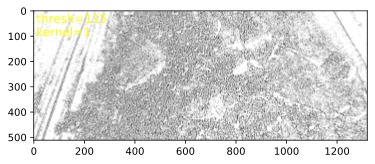

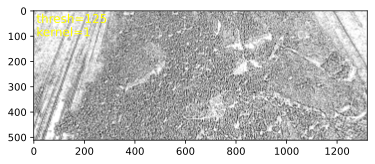

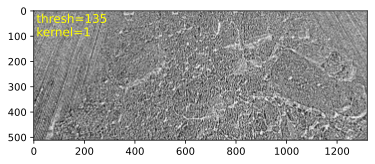

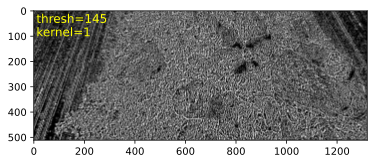

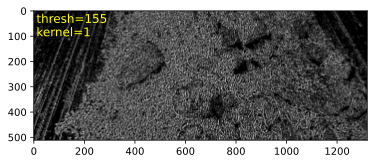

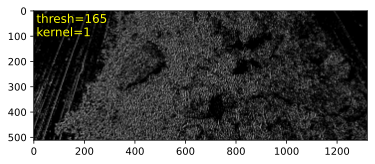

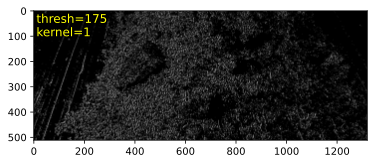

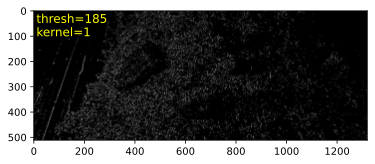

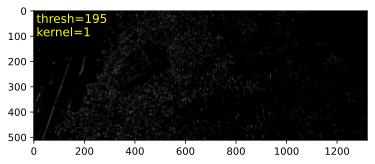

In [ ]:
for thresh in range(45, 200, 10):
    
    th, thresholded = cv2.threshold(norm_image, thresh, 255, cv2.THRESH_BINARY);
    plt.imshow(thresholded, cmap='gray')
    plt.text(10, 100, f'thresh={thresh}\nkernel={1}', fontsize=12, color=(1, 1, 0))

    plt.show();

### plot different kernel sizes

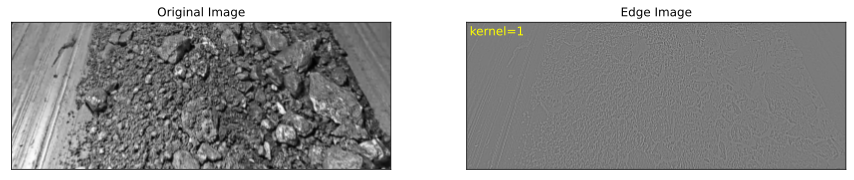

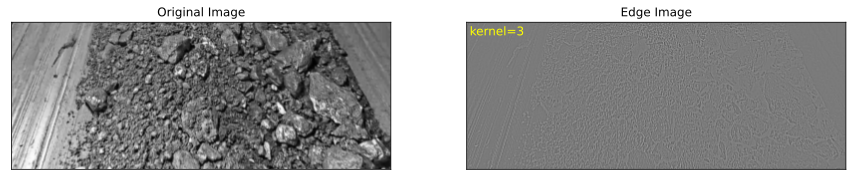

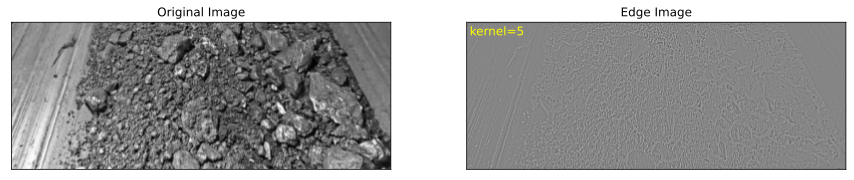

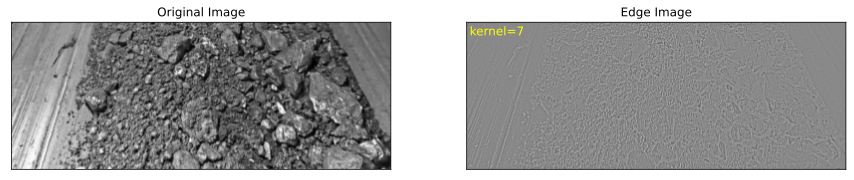

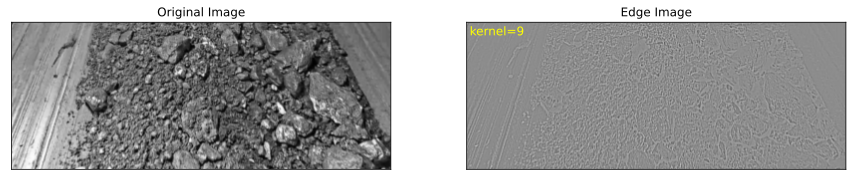

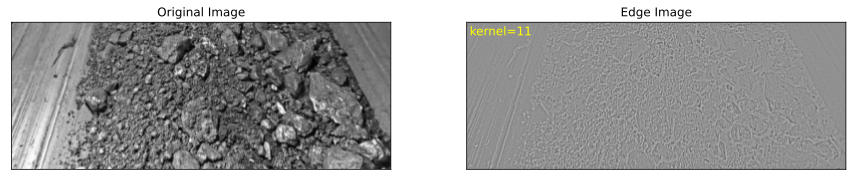

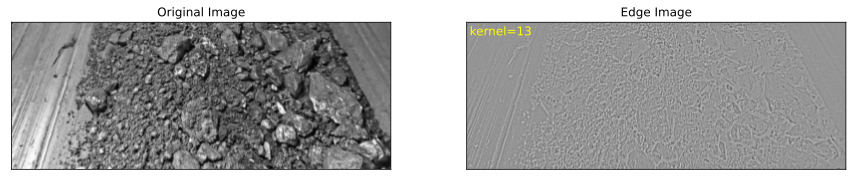

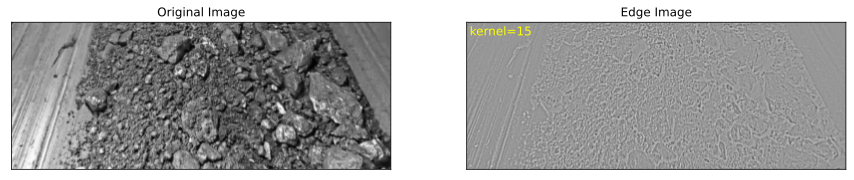

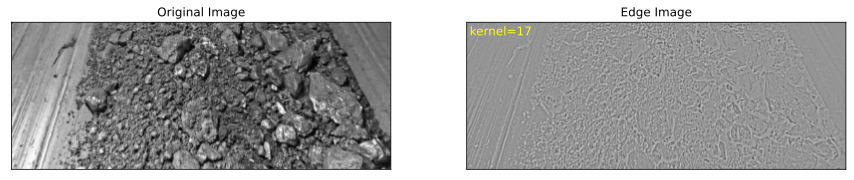

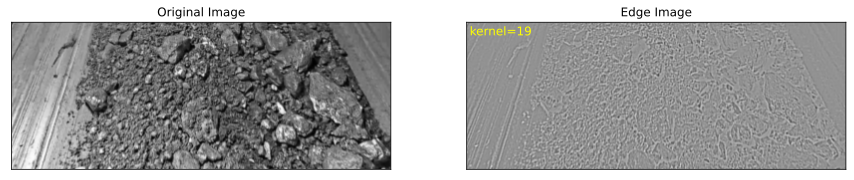

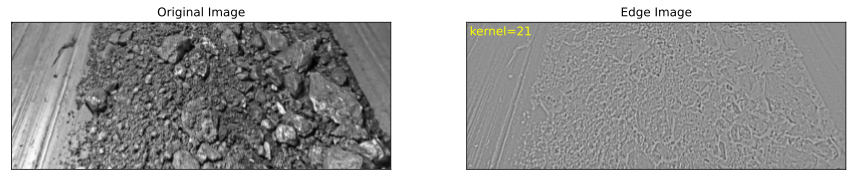

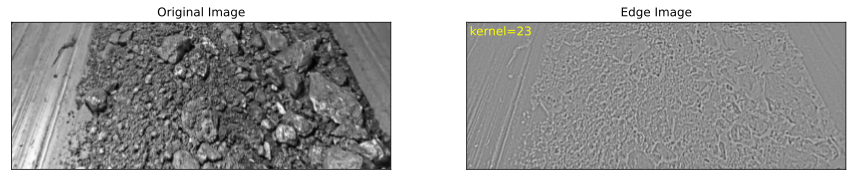

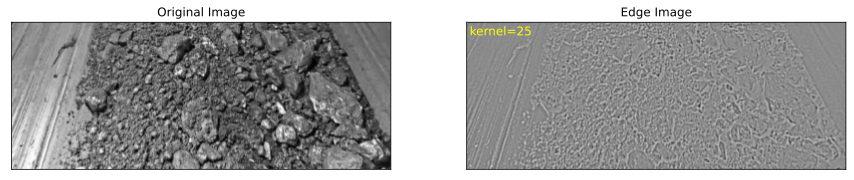

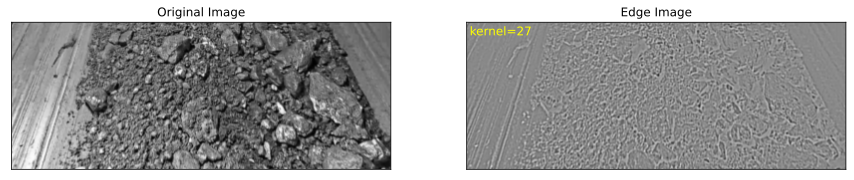

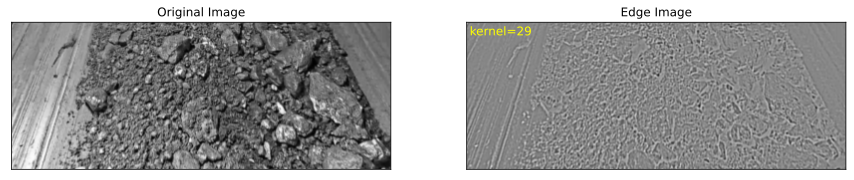

In [ ]:
for img_path in [glob.glob(DATA_DIR + '*.jpg')[0]]:
    img_gray = cv2.imread(img_path, 0)
    # Blur the image for better edge detection
    img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)

    for ksize in range(1, 30, 2):
        edges = cv2.Laplacian(img_blur, cv2.CV_64F, ksize=ksize)

        plt.figure(figsize=(15, 10))
        plt.subplot(121)
        plt.imshow(img_blur, cmap = 'gray')
        plt.title('Original Image')
        plt.xticks([]), plt.yticks([])

        plt.subplot(122)
        plt.imshow(edges, cmap = 'gray')
        plt.text(10, 45, f'kernel={ksize}', fontsize=12, color=(1, 1, 0))

        plt.title('Edge Image'), 
        plt.xticks([]), plt.yticks([])
        plt.show()

code for saving gif:

In [ ]:
start_image = None
appended_images = []

font                   = cv2.FONT_HERSHEY_SIMPLEX
bottomLeftCornerOfText = (10, 45)
fontScale              = 1
thickness              = 2
fontColor              = (0, 0, 0)
lineType               = 2


for img_path in [sorted(glob.glob(DATA_DIR + '*.jpg'))[0]]:
    img_gray = cv2.imread(img_path, 0)
    start_image = Image.fromarray(img_gray)
    img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)
    
    for ksize in range(1, 30, 2):
        edges = cv2.Laplacian(img_blur, cv2.CV_64F, ksize=ksize)

        cv2.rectangle(edges, 
                    (0, 0),
                    (175, 60),
                    (255, 255, 255),
                    -1)

        cv2.putText(
            img=edges,
            text=f'kernel={ksize}', 
            org=bottomLeftCornerOfText, 
            fontFace=font, 
            fontScale=fontScale,
            color=fontColor,
            thickness=thickness,
            lineType=lineType)

        appended_images.append(Image.fromarray(edges))

In [ ]:
start_image.save(fp='/content/laplacian.gif', format='GIF', append_images=appended_images,
         save_all=True, duration=1000, loop=0)